SUMMARY

The World Health Organization (WHO) characterized the COVID-19, caused by the SARS-CoV-2, as a pandemic on March 11, while the exponential increase in the number of cases was risking to overwhelm health systems around the world with a demand for ICU beds far above the existing capacity, with regions of Italy being prominent examples.

Brazil recorded the first case of SARS-CoV-2 on February 26, and the virus transmission evolved from imported cases only, to local and finally community transmission very rapidly, with the federal government declaring nationwide community transmission on March 20.

Until March 27, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68 related deaths, while the county of São Paulo, with a population of approximately 12 million people and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated death, as of March 23. Both the state and the county of São Paulo decided to establish quarantine and social distancing measures, that will be enforced at least until early April, in an effort to slow the virus spread.

One of the motivations for this challenge is the fact that in the context of an overwhelmed health system with the possible limitation to perform tests for the detection of SARS-CoV-2, testing every case would be impractical and tests results could be delayed even if only a target subpopulation would be tested.



In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [112]:
cb=pd.read_excel('/Users/drram/Documents/covid19_clinical_dataset.xlsx')
cb.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
cb.shape

(5644, 111)

In [114]:
cb.info

<bound method DataFrame.info of            Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1              

In [115]:
cb.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [116]:
cb.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

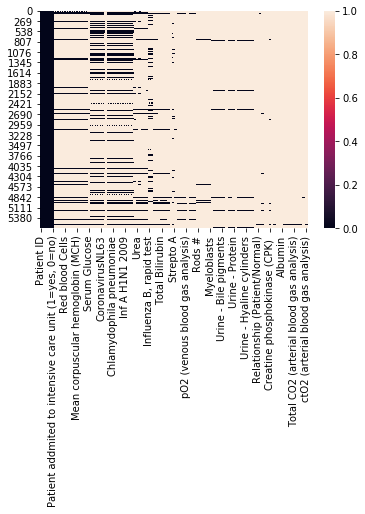

In [117]:
sns.heatmap(cb.isnull())

In [118]:
# checking the datatype of all columns
for i in cb.columns:
    print("The datatype of the column -", i, "is ---", cb[i].dtypes)

The datatype of the column - Patient ID is --- object
The datatype of the column - Patient age quantile is --- int64
The datatype of the column - SARS-Cov-2 exam result is --- object
The datatype of the column - Patient addmited to regular ward (1=yes, 0=no) is --- int64
The datatype of the column - Patient addmited to semi-intensive unit (1=yes, 0=no) is --- int64
The datatype of the column - Patient addmited to intensive care unit (1=yes, 0=no) is --- int64
The datatype of the column - Hematocrit is --- float64
The datatype of the column - Hemoglobin is --- float64
The datatype of the column - Platelets is --- float64
The datatype of the column - Mean platelet volume  is --- float64
The datatype of the column - Red blood Cells is --- float64
The datatype of the column - Lymphocytes is --- float64
The datatype of the column - Mean corpuscular hemoglobin concentration (MCHC) is --- float64
The datatype of the column - Leukocytes is --- float64
The datatype of the column - Basophils is 

In [119]:
# checking for missing values in each column
for i in cb.columns:
    print("The missing values in the column -", i, "is --- ", cb[i].isnull().sum())

The missing values in the column - Patient ID is ---  0
The missing values in the column - Patient age quantile is ---  0
The missing values in the column - SARS-Cov-2 exam result is ---  0
The missing values in the column - Patient addmited to regular ward (1=yes, 0=no) is ---  0
The missing values in the column - Patient addmited to semi-intensive unit (1=yes, 0=no) is ---  0
The missing values in the column - Patient addmited to intensive care unit (1=yes, 0=no) is ---  0
The missing values in the column - Hematocrit is ---  5041
The missing values in the column - Hemoglobin is ---  5041
The missing values in the column - Platelets is ---  5042
The missing values in the column - Mean platelet volume  is ---  5045
The missing values in the column - Red blood Cells is ---  5042
The missing values in the column - Lymphocytes is ---  5042
The missing values in the column - Mean corpuscular hemoglobin concentration (MCHC) is ---  5042
The missing values in the column - Leukocytes is --- 

In [120]:
# checking unique values in the dataset

pd.set_option('display.max_rows', 125)
col_name=[]
uni_name=[]
table=pd.DataFrame([])
for i in cb.columns:
    col_name.append(str(i))
    uni_name.append(cb[i].nunique())


table['columns']=col_name
table['No. of counts']=uni_name

table

,columns,No. of counts
0,Patient ID,5644
1,Patient age quantile,20
2,SARS-Cov-2 exam result,2
3,"Patient addmited to regular ward (1=yes, 0=no)",2
4,Patient addmited to semi-intensive unit (1=yes...,2
5,Patient addmited to intensive care unit (1=yes...,2
6,Hematocrit,176
7,Hemoglobin,84
8,Platelets,249
9,Mean platelet volume,48


In [121]:
for i in cb.columns:
    print(cb[i].value_counts())
    print("\n")

2f4fad16db49bb8    1
20cb502bacf3299    1
ba5d620cc292859    1
1bc9615cd885c23    1
203165c67027dd0    1
                  ..
612e6d2ec58a490    1
7,59895E+14        1
73c50679b64b2bd    1
517c98f422f4098    1
a34d12251a0e800    1
Name: Patient ID, Length: 5644, dtype: int64


11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64


negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64


0    5565
1      79
Name: Patient addmited to regular ward (1=yes, 0=no), dtype: int64


0    5594
1      50
Name: Patient addmited to semi-intensive unit (1=yes, 0=no), dtype: int64


0    5603
1      41
Name: Patient addmited to intensive care unit (1=yes, 0=no), dtype: int64


-0.473031    10
 0.190738     9
 0.694287     9
 0.556955     9
-0.495919     9
             ..
-1.045245     1
-3.3341

In [122]:
cb1=cb.drop(['Patient ID','Mycoplasma pneumoniae', 'Myeloblasts','Urine - Nitrite','Urine - Ketone Bodies','Urine - Sugar', 'Prothrombin time (PT), Activity','D-Dimer', 'Fio2 (venous blood gas analysis)', 'Vitamin B12','Partial thromboplastin time\xa0(PTT)\xa0','Urine - Aspect', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Color'], axis=1)
cb1.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
#These columns contain values like absent, normal, not done and present. We will replace them with suitable values
#.....and repalce missing values with -1
cols5=['Urine - Esterase', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts'] 
for i in cols5:
    cb1[i]=cb1[i].replace(['absent','normal','not_done','present'],[0,0,-1,1])
    cb1[i]=cb1[i].fillna(-1)
    print(cb1[i].value_counts())

-1.0    5585
 0.0      59
Name: Urine - Esterase, dtype: int64
-1.0    5575
 0.0      53
 1.0      16
Name: Urine - Hemoglobin, dtype: int64
-1.0    5575
 0.0      69
Name: Urine - Bile pigments, dtype: int64
-1.0    5576
 0.0      68
Name: Urine - Urobilinogen, dtype: int64
-1.0    5585
 0.0      59
Name: Urine - Protein, dtype: int64
-1.0    5577
 0.0      67
Name: Urine - Hyaline cylinders, dtype: int64
-1.0    5575
 0.0      69
Name: Urine - Granular cylinders, dtype: int64
-1.0    5574
 0.0      70
Name: Urine - Yeasts, dtype: int64


In [136]:
# These columns contains values like negative, positive, not done etc. We will replace them with suitable values 
# .....and replace missing value with -1
cols4=['Influenza B, rapid test', 'Influenza A, rapid test' , 'Strepto A']
for i in cols4:
    cb1[i]=cb1[i].replace(['negative','positive','not_done'],[0,1,-1])
    cb1[i]=cb1[i].fillna(-1)

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [137]:
# replacing the null values in the columns with mean where the data are already standardised. 
#.....The mean value in a standardised data is zero, so we will be replacing those values with zero.


cols=['Hematocrit','Hemoglobin','Platelets', 'Red blood Cells', 'Lymphocytes', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)', 'Serum Glucose',  'Neutrophils',  'Urea', 'Proteina C reativa mg/dL', 'Creatinine', 'Total Bilirubin', 'Direct Bilirubin', 'Indirect Bilirubin', 'Potassium', 'Sodium', 'Rods #', 'Alanine transaminase', 'Aspartate transaminase', 'Alkaline phosphatase','Magnesium', 'pCO2 (venous blood gas analysis)', 'Hb saturation (venous blood gas analysis)', 'Base excess (venous blood gas analysis)', 'pO2 (venous blood gas analysis)',  'Total CO2 (venous blood gas analysis)', 'pH (venous blood gas analysis)', 'HCO3 (venous blood gas analysis)', 'Segmented', 'Promyelocytes', 'Metamyelocytes', 'Myelocytes', 'Urine - pH', 'Urine - Density', 'Urine - Red blood cells', 'Relationship (Patient/Normal)', 'International normalized ratio (INR)', 'Lactic Dehydrogenase', 'Ferritin', 'Arterial Lactic Acid', 'Lipase dosage', 'Albumin', 'Hb saturation (arterial blood gases)', 'pCO2 (arterial blood gas analysis)', 'Base excess (arterial blood gas analysis)', 'pH (arterial blood gas analysis)', 'Total CO2 (arterial blood gas analysis)', 'HCO3 (arterial blood gas analysis)', 'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor', 'ctO2 (arterial blood gas analysis)']
                                     
for i in cols:
      cb1[i]=cb1[i].fillna(0)

In [138]:
# columns here contains two values, not detected and detected, these are replaced with 0 and 1
cols1=['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']

for i in cols1:
    cb1[i]=cb1[i].replace(['not_detected','detected'],[0,1])



TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [139]:
# After replacing values, the null values are filled by -1
cols1=['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']

for i in cols1:
    cb1[i]=cb1[i].fillna(-1)
    print(cb1[i].value_counts())

-1.0    4290
 0.0    1302
 1.0      52
Name: Respiratory Syncytial Virus, dtype: int64
-1.0    4290
 0.0    1336
 1.0      18
Name: Influenza A, dtype: int64
-1.0    4290
 0.0    1277
 1.0      77
Name: Influenza B, dtype: int64
-1.0    4292
 0.0    1349
 1.0       3
Name: Parainfluenza 1, dtype: int64
-1.0    4292
 0.0    1307
 1.0      45
Name: CoronavirusNL63, dtype: int64
-1.0    4292
 0.0     973
 1.0     379
Name: Rhinovirus/Enterovirus, dtype: int64
-1.0    4292
 0.0    1332
 1.0      20
Name: Coronavirus HKU1, dtype: int64
-1.0    4292
 0.0    1342
 1.0      10
Name: Parainfluenza 3, dtype: int64
-1.0    4292
 0.0    1343
 1.0       9
Name: Chlamydophila pneumoniae, dtype: int64
-1.0    4292
 0.0    1339
 1.0      13
Name: Adenovirus, dtype: int64
-1.0    4292
 0.0    1333
 1.0      19
Name: Parainfluenza 4, dtype: int64
-1.0    4292
 0.0    1343
 1.0       9
Name: Coronavirus229E, dtype: int64
-1.0    4292
 0.0    1344
 1.0       8
Name: CoronavirusOC43, dtype: int64
-1.0    4

In [140]:
# replacing the null values in the other columns with mean where the data are already standardised. 
#.....The mean value in a standardised data is zero, so we will be replacing those values with zero.

cols8=['Mean platelet volume ','Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Gamma-glutamyltransferase\xa0',  'Ionized calcium\xa0', 'Creatine phosphokinase\xa0(CPK)\xa0']
for i in cols8:
    cb1[i]=cb1[i].fillna(0)
    print(cb1[i].value_counts())

 0.000000    5045
-0.550290      36
 0.010677      30
-0.438097      27
-0.774677      27
-0.213711      27
-0.325903      26
 0.683835      25
 0.796029      25
-0.662483      24
-1.111256      23
 0.235063      23
 0.459449      23
-0.101517      22
-0.999063      21
-1.223449      19
 0.908221      18
 0.122869      18
 0.347255      17
 1.020415      14
 1.132609      14
 0.571643      13
-1.335643      11
-1.560029      11
-0.886869       9
 1.693575       9
 1.244801       8
-1.447836       8
 1.469188       7
 1.581381       7
-1.672222       6
-1.896609       6
 1.356995       6
 1.917961       6
 2.254541       5
 2.030154       4
 1.805767       4
 2.703313       4
-1.784415       3
 2.142347       3
 2.366734       2
-2.120995       1
-2.008802       1
 3.713052       1
-2.457575       1
 2.478927       1
 2.927700       1
-2.345381       1
 2.591120       1
Name: Mean platelet volume , dtype: int64
 0.000000    5042
-0.154166      31
 0.343725      30
-0.054585      28
-0.2

In [141]:
# replacing a categorical variable with a numerical value 9. There is only one categorical value in this column.
cb1['Urine - pH']=cb1['Urine - pH'].replace('Não Realizado','9')

In [142]:
# Need to change the datatype of Urine - pH  
cb1['Urine - pH']=cb1['Urine - pH'].astype(float)

In [143]:
# If we observe the values in the column 'Urine = pH' properly, we can know that the data is not scaled. Hence we need to scale it.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cb1['Urine - pH']=pd.DataFrame(scaler.fit_transform(pd.DataFrame(cb1['Urine - pH'])))

In [144]:
cb1.isnull().sum()
# There are no null values in the dataset. All the null values have been replaced with appropriate values.

Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
Hematocrit                                               0
Hemoglobin                                               0
Platelets                                                0
Mean platelet volume                                     0
Red blood Cells                                          0
Lymphocytes                                              0
Mean corpuscular hemoglobin concentration (MCHC)         0
Leukocytes                                               0
Basophils                                                0
Mean corpuscular hemoglobin (MCH)                        0
Eosinophils                                              0
Mean corpuscular volume (MCV)                           

In [145]:
#checking how many patients have been tested positive and negative
cb1['SARS-Cov-2 exam result'].value_counts()
#5086 patients have been tested positive and 558 patients have been tested negative.

0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64

In [146]:
# The 'SARS-Cov-2 exam result' column values needs to be replaced with 0 and 1 to fit into the model later.
cb1['SARS-Cov-2 exam result']=cb1['SARS-Cov-2 exam result'].replace(['negative','positive'],[0,1])
cb1['SARS-Cov-2 exam result'].value_counts() 
# The values are replaced successfully

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [147]:
cb1.head()
# we need to scale Patient age quantile separately as other columns are already been scaled.

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cb1['Patient age quantile']=pd.DataFrame(scaler.fit_transform(pd.DataFrame(cb1['Patient age quantile'])))
cb1['Patient age quantile'].head()

0    0.637244
1    1.329598
2   -0.228198
3   -0.747464
4    0.983421
Name: Patient age quantile, dtype: float64

### Bivariate Analysis

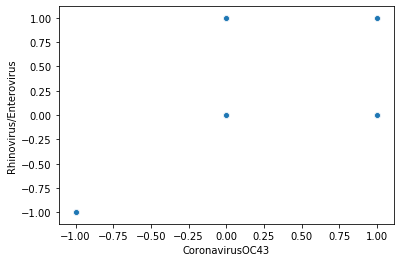

In [149]:
#scatterplot
sns.scatterplot(x='CoronavirusOC43',y='Rhinovirus/Enterovirus',data=cb1)
# These show a linear relationship to some extent

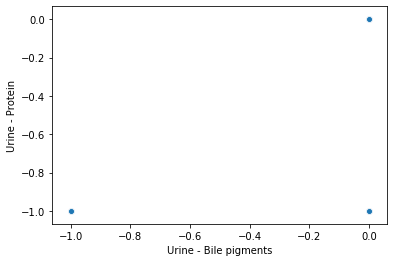

In [150]:
sns.scatterplot(x='Urine - Bile pigments',y='Urine - Protein',data=cb1)
# These show linear relationship, but more data is required to confirm it

### Univariate Analysis

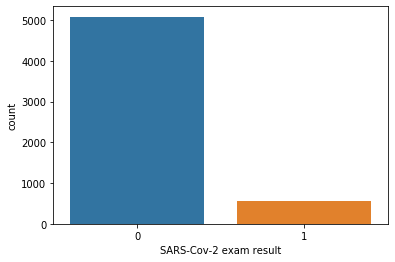

In [151]:
sns.countplot(cb1['SARS-Cov-2 exam result'])

In [152]:
cb1['Patient age quantile'].value_counts()
# The values in the column have been scaled 

 0.291067    380
-0.920552    366
-0.055110    359
-1.612906    334
-0.401287    319
-1.266729    315
 0.637244    313
 0.810333    299
-0.747464    294
-0.574375    281
 1.156510    279
 1.675775    275
 0.983421    269
 1.329598    263
 1.502687    259
-1.093641    251
-1.439818    234
 0.464156    197
 0.117979    190
-0.228198    167
Name: Patient age quantile, dtype: int64

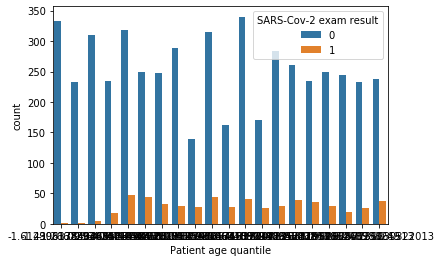

In [153]:
sns.countplot(cb1['Patient age quantile'], hue=cb1['SARS-Cov-2 exam result'])

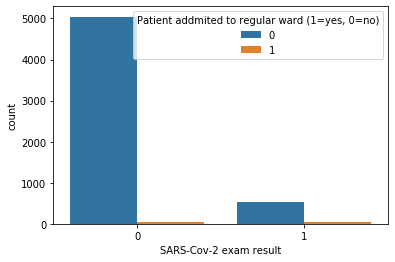

In [154]:
sns.countplot(cb1['SARS-Cov-2 exam result'], hue=cb1['Patient addmited to regular ward (1=yes, 0=no)'])

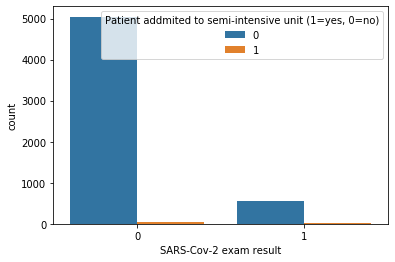

In [155]:
sns.countplot(cb1['SARS-Cov-2 exam result'], hue=cb1['Patient addmited to semi-intensive unit (1=yes, 0=no)'])

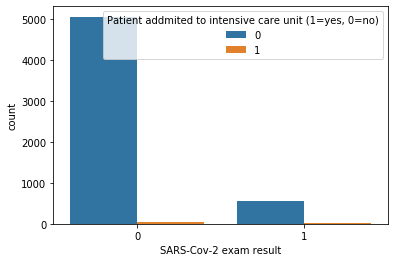

In [156]:
sns.countplot(cb1['SARS-Cov-2 exam result'], hue=cb1['Patient addmited to intensive care unit (1=yes, 0=no)'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a329e4350>,
      dtype=object)

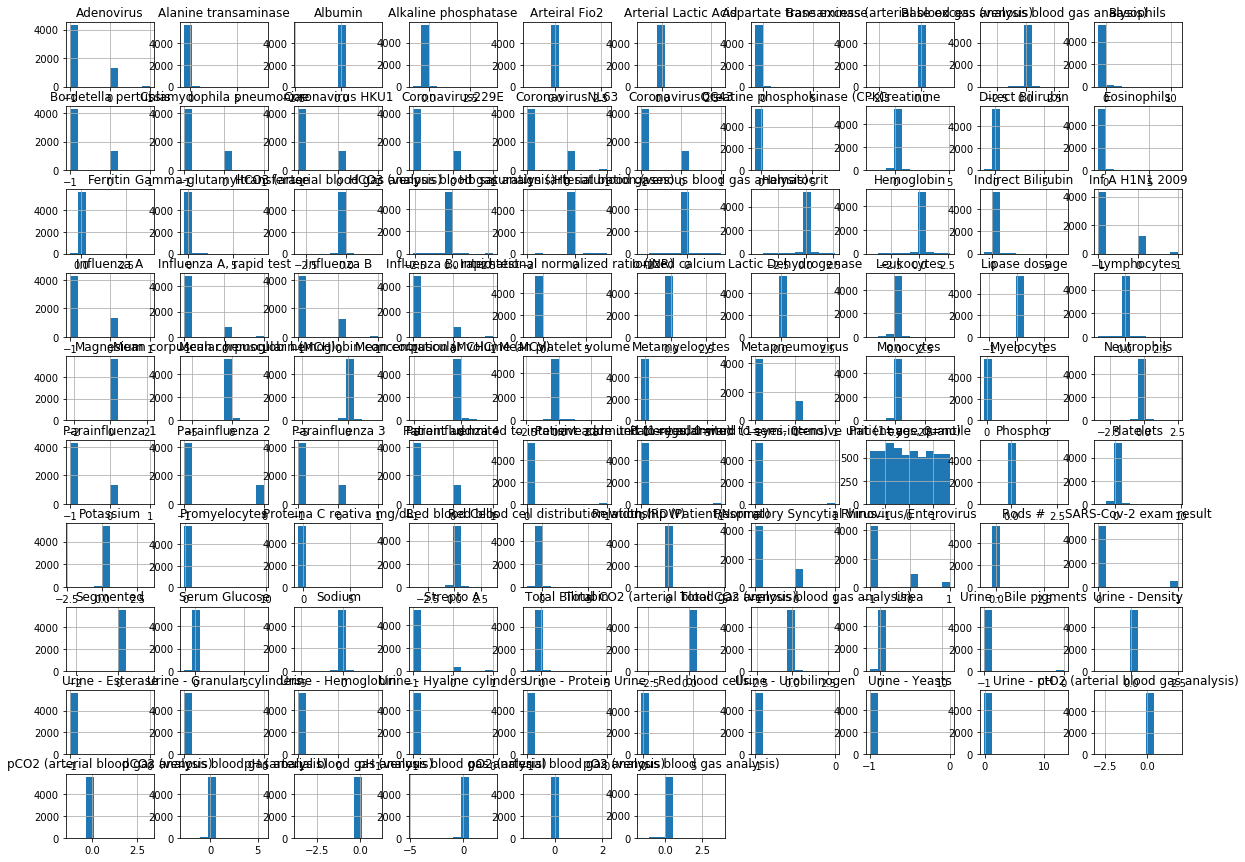

In [157]:
cb1.hist(figsize=(20,15))
# Many columns are not distributed well

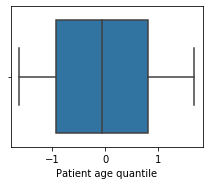

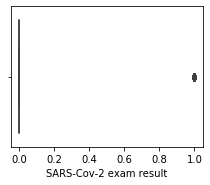

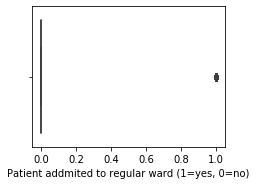

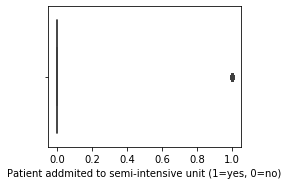

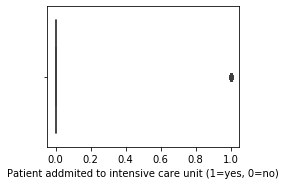

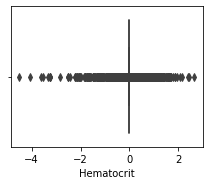

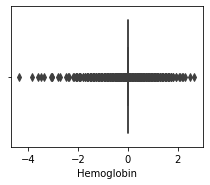

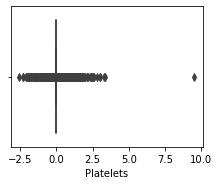

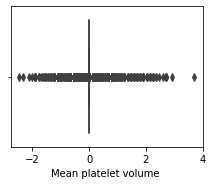

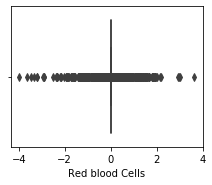

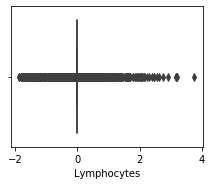

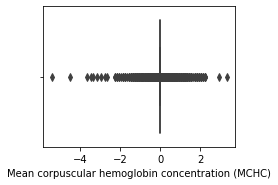

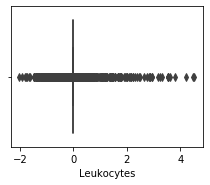

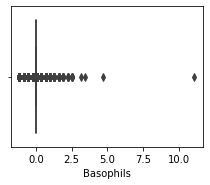

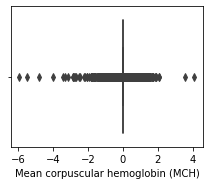

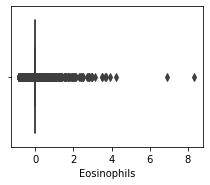

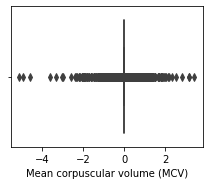

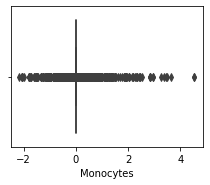

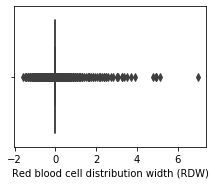

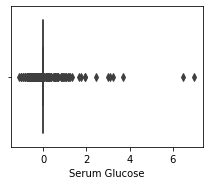

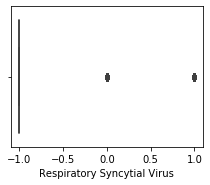

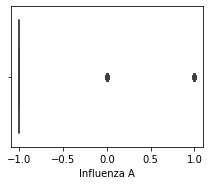

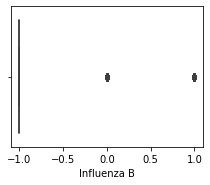

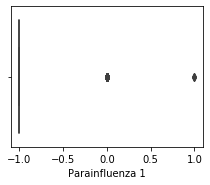

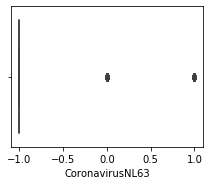

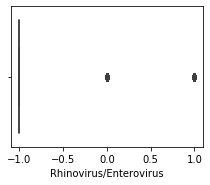

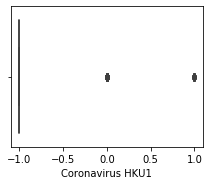

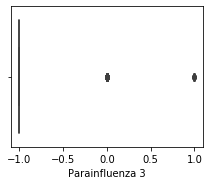

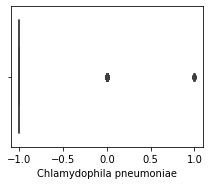

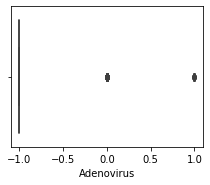

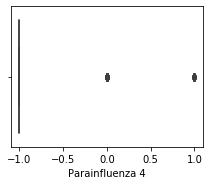

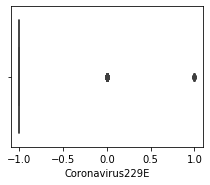

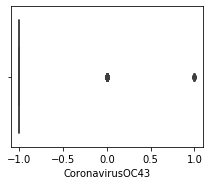

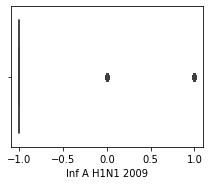

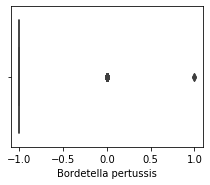

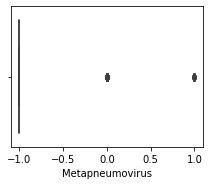

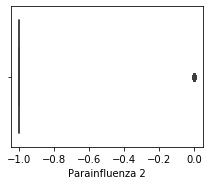

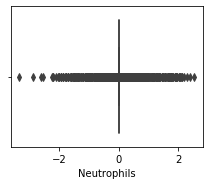

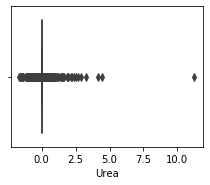

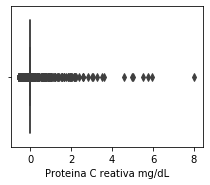

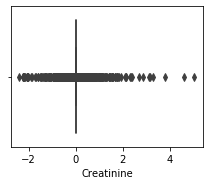

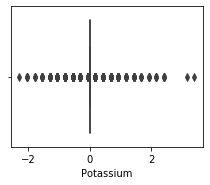

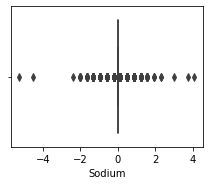

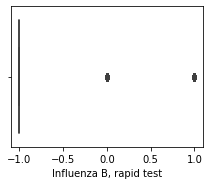

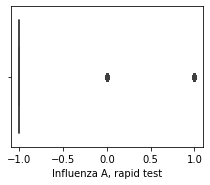

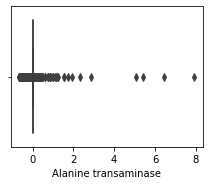

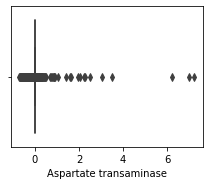

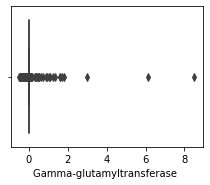

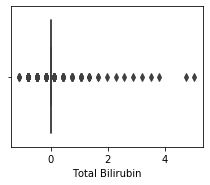

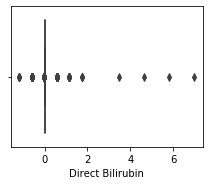

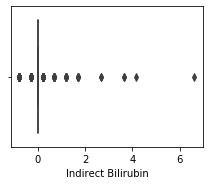

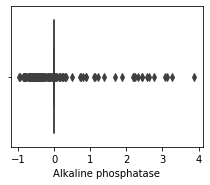

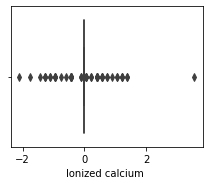

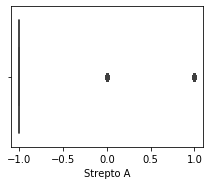

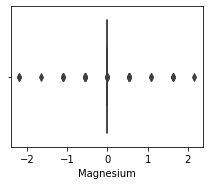

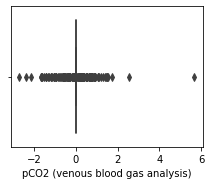

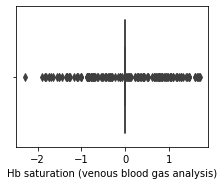

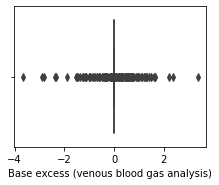

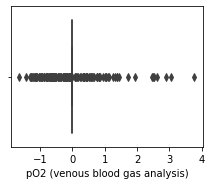

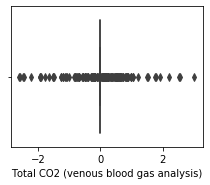

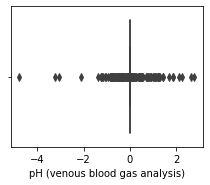

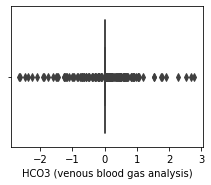

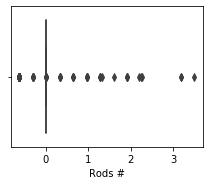

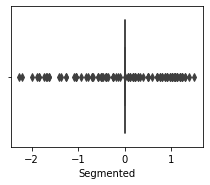

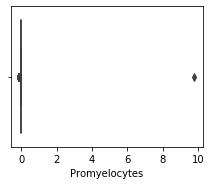

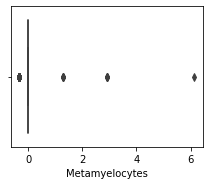

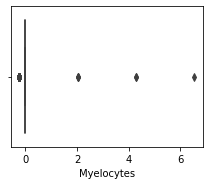

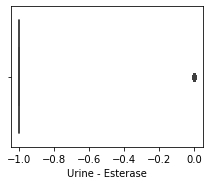

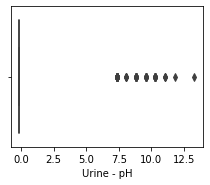

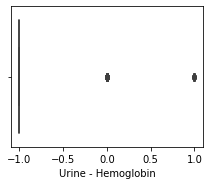

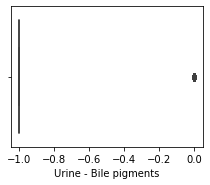

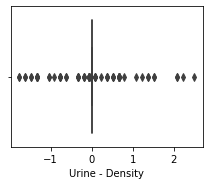

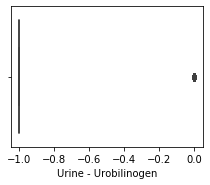

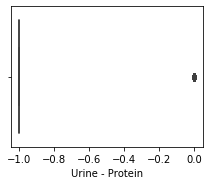

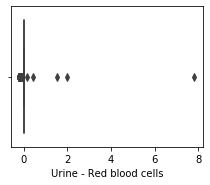

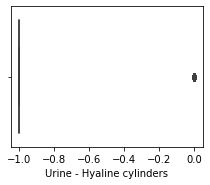

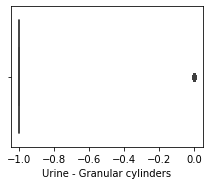

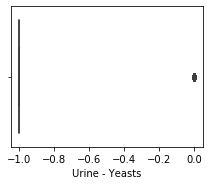

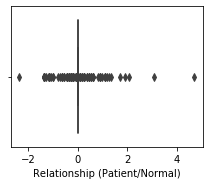

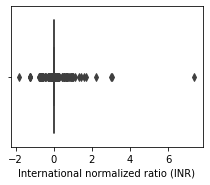

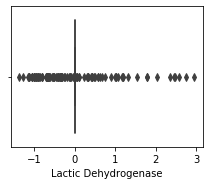

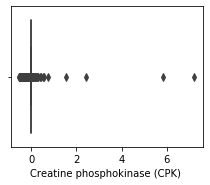

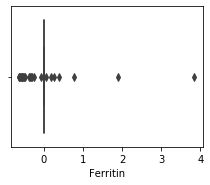

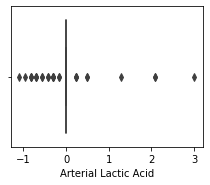

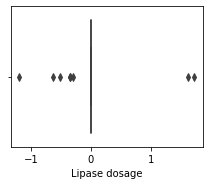

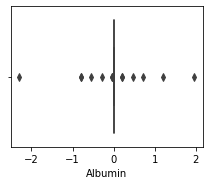

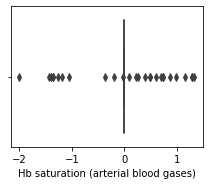

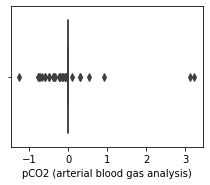

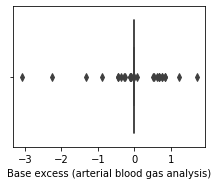

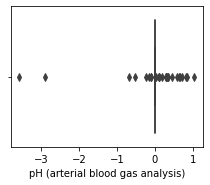

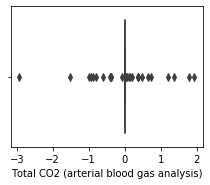

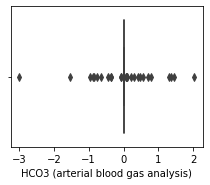

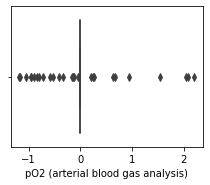

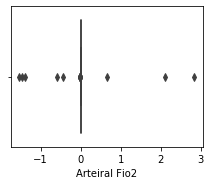

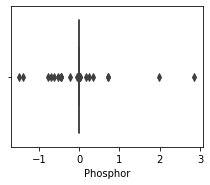

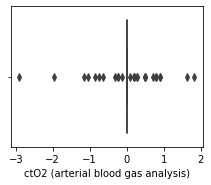

In [158]:
for i in cb1.columns:
    if cb1[i].dtypes!='O':
        plt.figure(figsize=(20,15))
        plt.subplot(5,5,5)
        sns.boxplot(cb1[i])
#There are many outliers in the data

In [159]:
cb1.groupby(cb1['SARS-Cov-2 exam result']).mean()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,
0,-0.024923,0.008455,0.008258,0.006488,-0.004049,-0.004280,0.011519,-0.004383,-0.004951,0.000622,...,-0.000348,0.000859,-0.000346,-0.000835,0.000662,0.000567,-0.000829,0.000608,0.000105,-0.000709
1,0.227167,0.064516,0.014337,0.014337,0.036903,0.039009,-0.104991,0.039953,0.045125,-0.005668,...,0.003172,-0.007833,0.003155,0.007611,-0.006030,-0.005170,0.007556,-0.005538,-0.000955,0.006466


### Statistical Analysis

In [160]:
cb1.describe()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5.644000e+03,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,...,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03
mean,-3.855094e-15,0.098866,0.013997,0.008859,0.007264,-2.335732e-10,-1.710835e-09,-3.770503e-11,7.894130e-10,8.985679e-10,...,-6.600441e-13,4.026270e-11,-7.920532e-12,1.980133e-12,-3.574553e-11,2.904195e-11,-1.181479e-10,1.650111e-11,2.244151e-11,2.508169e-11
std,1.000089e+00,0.298509,0.117489,0.093713,0.084929,3.268915e-01,3.268915e-01,3.266203e-01,3.258055e-01,3.266203e-01,...,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,5.953330e-02,5.953330e-02,6.917145e-02
min,-1.612906e+00,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,-9.205523e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-5.510986e-02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.103326e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.675775e+00,1.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


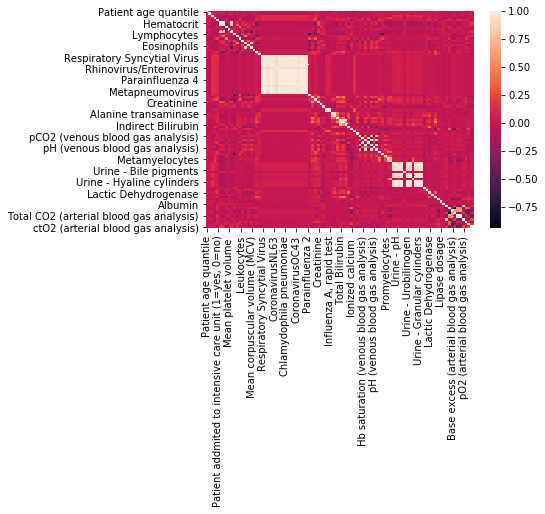

In [161]:
sns.heatmap(cb1.corr())

In [162]:
cb1.corr()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,7.524442e-02,4.616576e-02,1.573586e-02,-3.577158e-02,0.031292,0.019498,-0.051183,0.038392,-0.012099,...,-1.628616e-02,-3.411040e-02,4.148422e-02,4.150677e-02,6.263816e-03,1.208974e-02,-7.157476e-03,-2.123879e-02,-4.135060e-02,-4.455310e-03
SARS-Cov-2 exam result,0.075244,1.000000e+00,1.424375e-01,1.936368e-02,2.758612e-02,0.037396,0.039530,-0.106482,0.040622,0.045766,...,1.518915e-02,-3.751081e-02,1.511081e-02,3.645055e-02,-2.887860e-02,-2.476101e-02,3.618625e-02,-3.081549e-02,-5.314858e-03,3.096676e-02
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,1.424375e-01,1.000000e+00,-1.126431e-02,-1.019207e-02,-0.071569,-0.075363,-0.150186,-0.010687,-0.043593,...,5.113309e-02,-5.851001e-02,8.631881e-03,5.254042e-02,-4.123001e-02,-3.442683e-02,2.724735e-02,-4.032552e-02,-4.491712e-11,7.046189e-02
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,1.936368e-02,-1.126431e-02,1.000000e+00,-8.087334e-03,-0.161800,-0.157295,0.006185,-0.020840,-0.122487,...,-1.992934e-01,4.033269e-02,-8.063965e-02,-6.379294e-02,-4.014409e-02,-4.865558e-02,-1.207235e-01,-2.510643e-02,5.392442e-02,-1.748055e-02
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,2.758612e-02,-1.019207e-02,-8.087334e-03,1.000000e+00,-0.151409,-0.147314,0.103724,-0.060529,-0.099364,...,1.113629e-01,9.429328e-02,6.438466e-02,-5.686301e-02,1.343748e-01,1.300176e-01,4.923709e-02,1.056515e-01,3.943719e-02,-1.212424e-01
Hematocrit,0.031292,3.739641e-02,-7.156877e-02,-1.618000e-01,-1.514087e-01,1.000000,0.968447,-0.082256,0.083386,0.872565,...,-9.116644e-03,-3.548773e-02,-3.860283e-02,1.257515e-02,-6.770479e-02,-6.701362e-02,2.444945e-02,1.228437e-02,3.685211e-02,1.729492e-01
Hemoglobin,0.019498,3.953027e-02,-7.536312e-02,-1.572954e-01,-1.473140e-01,0.968447,1.000000,-0.120121,0.078568,0.841215,...,-7.288647e-03,-3.704248e-02,-5.660003e-02,7.466159e-03,-8.672076e-02,-8.715109e-02,1.687693e-02,-6.549185e-04,5.783412e-02,1.831837e-01
Platelets,-0.051183,-1.064816e-01,-1.501864e-01,6.185259e-03,1.037238e-01,-0.082256,-0.120121,1.000000,-0.353451,-0.054561,...,1.553774e-02,1.009351e-01,-5.546508e-02,-9.827285e-02,3.749131e-02,2.506094e-02,-2.584989e-02,8.184474e-02,4.996915e-02,-9.043543e-02
Mean platelet volume,0.038392,4.062155e-02,-1.068711e-02,-2.083990e-02,-6.052921e-02,0.083386,0.078568,-0.353451,1.000000,0.042740,...,-7.318341e-02,1.884004e-02,3.376061e-02,-2.081514e-03,5.451411e-02,5.554191e-02,-4.715921e-02,1.361770e-02,-4.170333e-02,3.777505e-03
Red blood Cells,-0.012099,4.576615e-02,-4.359251e-02,-1.224874e-01,-9.936380e-02,0.872565,0.841215,-0.054561,0.042740,1.000000,...,5.683619e-03,-6.762497e-02,7.695134e-03,5.023546e-02,-5.840786e-02,-5.161800e-02,3.862132e-02,-4.580953e-02,3.543826e-02,1.636574e-01


#### Removing outliers

In [163]:
#checking for outliers
from scipy.stats import zscore
z=zscore(cb1)
print("The shape before the outliers are removed", cb1.shape)
cb2=cb1[(z<3).all(axis=1)]
print("The shape after the outliers are removed", cb2.shape)

The shape before the outliers are removed (5644, 96)
The shape after the outliers are removed (4031, 96)


In [164]:
cb1.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,0.637244,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.329598,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.228198,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.747464,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.983421,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
# Separating four target variables from the data. 
# The first target is SARS-Cov-2 exam result whether positive or negative. 
# The second target is whether person admitted to regular ward or not 
# the third target is whether person admitted to semi-intensive unit
# the fourth target is whether person admitted to intensive care unit
y=pd.DataFrame(cb1['SARS-Cov-2 exam result'])
y1=pd.DataFrame(cb1['Patient addmited to regular ward (1=yes, 0=no)'])
y2=pd.DataFrame(cb1['Patient addmited to semi-intensive unit (1=yes, 0=no)'])
y3=pd.DataFrame(cb1['Patient addmited to intensive care unit (1=yes, 0=no)'])
x=cb1.drop(['Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)'],axis=1)

### PCA-Principle Component Analysis
to reduce the number of columns

In [166]:
from sklearn.decomposition import PCA
pca=PCA(n_components=30)
x=pca.fit_transform(x)
x.shape

(5644, 30)

In [167]:
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.045943,0.047245,-0.629949,0.036295,-0.096990,0.081676,-0.009755,-0.044261,-0.012343,-0.003216,...,-0.001676,0.002237,-0.005385,0.002985,-0.001553,0.000628,-0.000122,-0.002610,-0.000051,-0.000002
1,3.366830,-0.063288,-1.411565,-0.623296,0.641577,-0.898750,0.806269,1.140377,1.400186,-0.219170,...,-0.001886,0.478903,0.136530,0.568215,-1.189039,-0.015462,-0.617358,0.127105,-0.272585,-0.046961
2,-1.029635,-0.098955,0.213185,0.010069,-0.180014,0.096304,-0.071099,0.009245,-0.005362,0.014584,...,-0.003193,-0.000361,0.000715,-0.003981,0.005200,-0.001210,0.000177,-0.001808,0.001458,-0.001868
3,-1.019850,-0.186676,0.719066,-0.005667,-0.229828,0.105082,-0.107906,0.041349,-0.001174,0.025264,...,-0.004103,-0.001920,0.004375,-0.008160,0.009253,-0.002312,0.000356,-0.001326,0.002364,-0.002988
4,3.352902,-0.127784,-1.104243,-0.019550,-0.185772,0.123260,-0.021412,-0.103074,0.039983,-0.009901,...,-0.096240,0.019139,-0.039870,0.643132,-0.157955,-0.117055,0.029400,0.040293,0.072677,-0.024423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,-1.019215,-0.233265,1.033192,-0.053241,-0.259467,0.127417,-0.142643,0.130115,-0.177415,-0.017320,...,0.006967,0.009746,0.007228,0.023096,-0.020077,0.006761,-0.016302,0.030147,-0.006561,0.025840
5640,-1.058990,0.164206,-1.304456,0.057276,-0.030570,0.069973,0.039320,-0.087065,-0.017928,-0.017455,...,-0.000462,0.004316,-0.010266,0.008558,-0.006956,0.002099,-0.000361,-0.003253,-0.001259,0.001491
5641,-1.016589,-0.215916,0.887692,-0.010912,-0.246433,0.108008,-0.120175,0.052050,0.000222,0.028824,...,-0.004407,-0.002440,0.005595,-0.009553,0.010603,-0.002680,0.000416,-0.001166,0.002665,-0.003361
5642,-0.599724,7.638231,1.192664,-0.679496,-0.195010,0.261703,0.080174,-0.345207,-0.004573,0.342180,...,-0.039558,0.034767,-0.092556,-0.041241,0.043609,0.034494,-0.059025,-0.027274,0.096595,0.080060


In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [169]:
# determining the best random state for the model
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20, shuffle=True)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        acc_score=accuracy_score(test_y,pred)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [170]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

The maximum accuracy score 1.0 is achieved at 42


1.0

In [171]:
#Lets finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.20)

Using GridSearchCV

In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x,train_y)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}

In [173]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x,train_y)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [174]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x,train_y)
gdsv.best_params_

{'C': 1, 'kernel': 'linear'}

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
The accuracy score is  1.0
The cross val score is 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1021
           1       1.00      1.00      1.00       108

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129


[[1021    0]
 [   0  108]]

roc_auc_score 1.0


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')
The acc

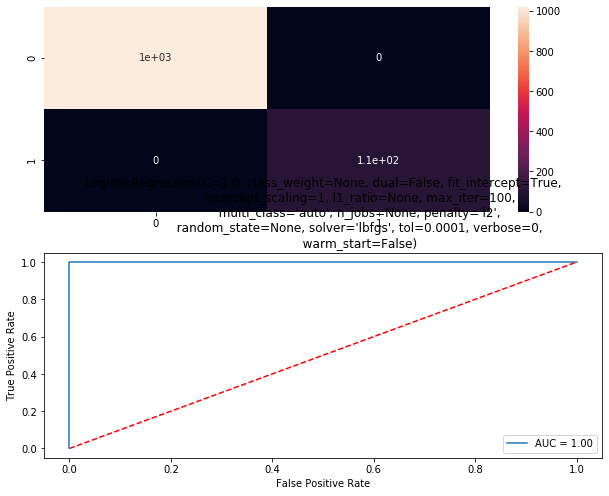

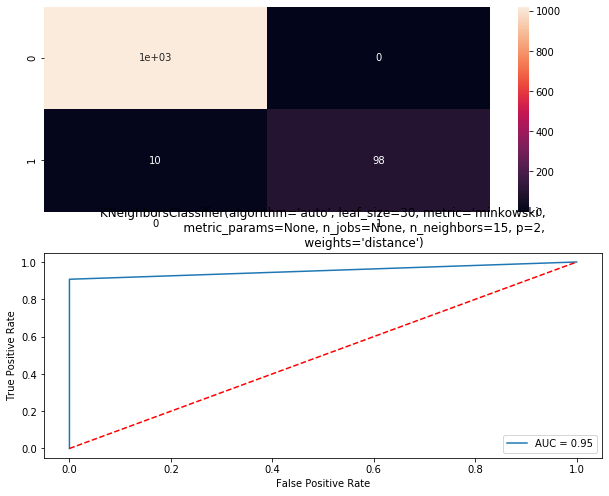

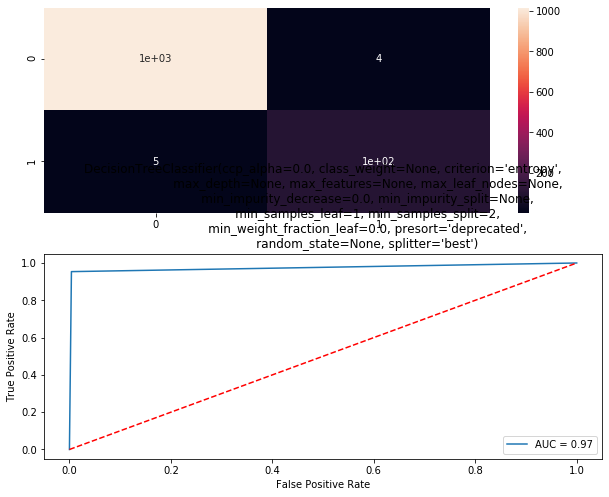

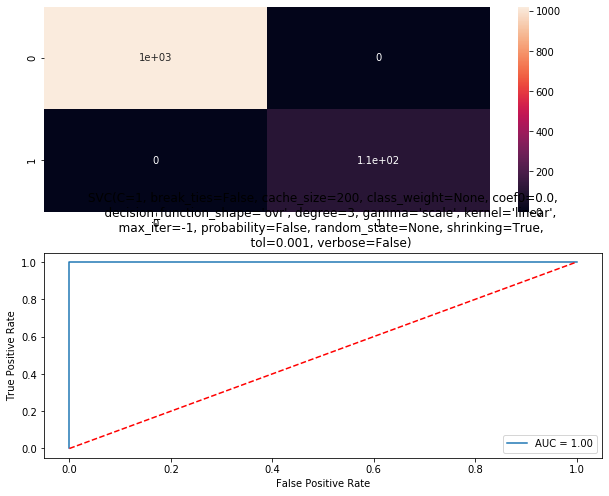

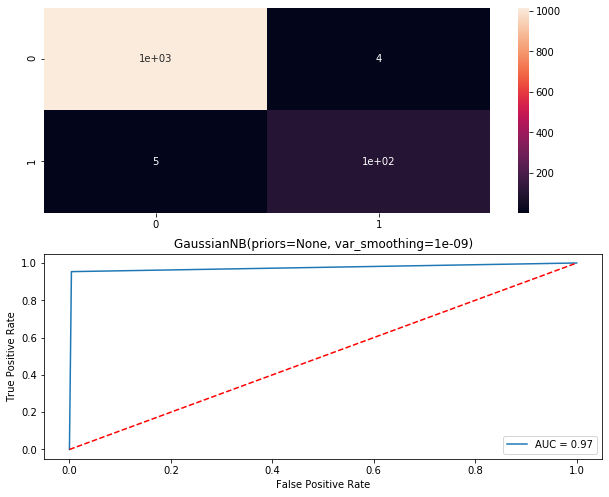

In [175]:
#After obtaining best parameters, we should now check the models
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 15, weights='distance'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=1, kernel='linear'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    accscore=accuracy_score(test_y,pred)
    score.append(accscore)
    print("The accuracy score is ", accscore)
    cvscore=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y,pred))
    print()
    cm=confusion_matrix(test_y,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [176]:
result1=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB()],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result1

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,1.000000,1.000000,1.000000
1,<class 'sklearn.neighbors._classification.KNei...,0.991143,0.990788,0.953704
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.992028,0.990430,0.974893
3,<class 'sklearn.svm._classes.SVC'>,1.000000,1.000000,1.000000
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.992028,0.948075,0.974893


In [177]:
# Let us finalise the Logistic regression
lg=LogisticRegression()
lg.fit(train_x,train_y)
pred=lg.predict(test_x)
acc_score=accuracy_score(pred,test_y)
print("The accuracy score is", acc_score)
cross_score=cross_val_score(lg,x,y,cv=5,scoring='accuracy').mean()
print("The cross validation score is ", cross_score)

The accuracy score is 1.0
The cross validation score is  1.0


In [178]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(lg,"Project20_Covid prediction.pkl")

['Project20_Covid prediction.pkl']

#### Predicting the second target - whether the patient is admitted to the general ward

In [179]:
# checking the best random state
def max_acc_score(reg,x,y1):
    max_score=0
    for r_state in range (42,101):
        train_x1,test_x1,train_y1,test_y1=train_test_split(x,y1,random_state=r_state,test_size=0.20)
        reg.fit(train_x1,train_y1)
        pred=reg.predict(test_x1)
        acc_score=accuracy_score(test_y1,pred)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [180]:
lg=LogisticRegression()
max_acc_score(lg,x,y1)

The maximum accuracy score 0.9911426040744021 is achieved at 71


0.9911426040744021

In [181]:
#Lets finalise the train and test data
train_x1,test_x1,train_y1,test_y1=train_test_split(x,y1,random_state=59,test_size=0.20)

Using GridSearchCV for best parameters

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x1,train_y1)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}

In [183]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x1,train_y1)
gddt.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [184]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x1,train_y1)
gdsv.best_params_

{'C': 1, 'kernel': 'linear'}

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
The accuracy score is  0.9902568644818424
The cross val score is 0.9845837338007023

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1121
           1       0.29      0.25      0.27         8

    accuracy                           0.99      1129
   macro avg       0.64      0.62      0.63      1129
weighted avg       0.99      0.99      0.99      1129


[[1116    5]
 [   6    2]]

roc_auc_score 0.6227698483496878


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
   

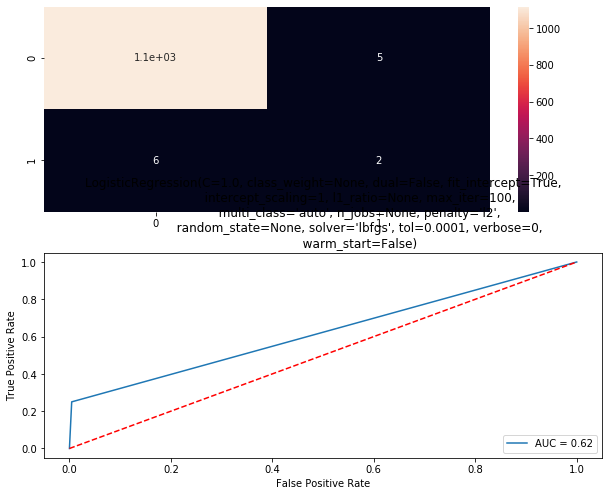

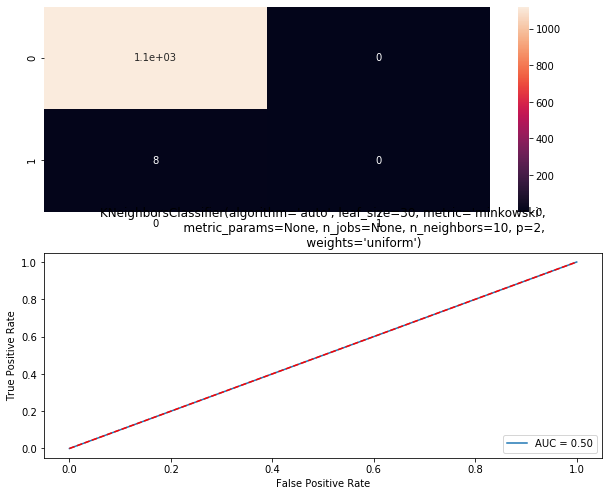

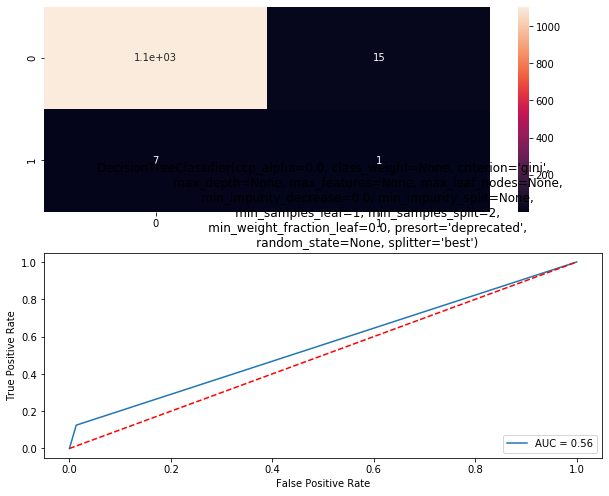

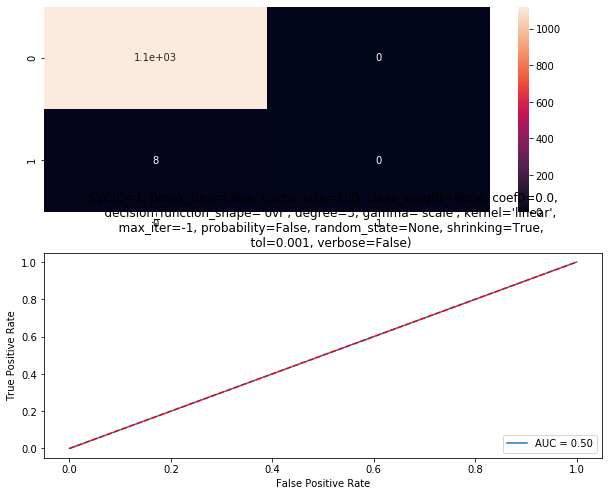

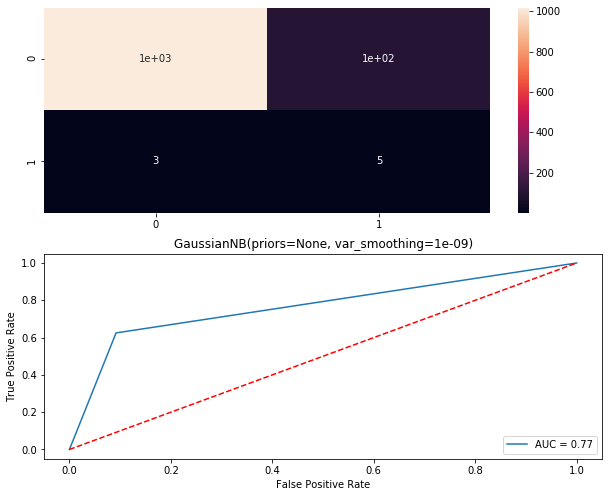

In [185]:
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 10, weights='uniform'), DecisionTreeClassifier(criterion= 'gini', splitter= 'best'), SVC(C=1, kernel='linear'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x1,train_y1)
    pred=i.predict(test_x1)
    accscore=accuracy_score(test_y1,pred)
    score.append(accscore)
    print("The accuracy score is ", accscore)
    cvscore=cross_val_score(i,x,y1,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y1,pred))
    print()
    cm=confusion_matrix(test_y1,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y1,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [186]:
result2=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB()],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result2

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.990257,0.984584,0.622770
1,<class 'sklearn.neighbors._classification.KNei...,0.992914,0.986003,0.500000
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.980514,0.977496,0.555810
3,<class 'sklearn.svm._classes.SVC'>,0.992914,0.985826,0.500000
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.906112,0.910166,0.766559


In [187]:
# Let us finalise the GaussianNB as it is giving better AUC ROC scores along with good accuracy and cross val scores as well
gb=GaussianNB()
gb.fit(train_x1,train_y1)
pred=gb.predict(test_x1)
acc_score=accuracy_score(pred,test_y1)
print("The accuracy score is", acc_score)
cross_score=cross_val_score(gb,x,y1,cv=5,scoring='accuracy').mean()
print("The cross validation score is ", cross_score)

The accuracy score is 0.9061116031886626
The cross validation score is  0.9101662175150294


In [188]:
#Saving the model
joblib.dump(gb,"Project20_General ward prediction.pkl")

['Project20_General ward prediction.pkl']

Predicting the third target - whether the patient is admitted to the semi intensive unit care


In [189]:
# Lets check the best random_state
def max_acc_score(lr,x,y):
    max_score=0
    for r_state in range(42,101):
        train_x2,test_x2,train_y2,test_y2=train_test_split(x,y2,random_state=r_state,test_size=0.20)
        lr.fit(train_x2,train_y2)
        pred=lr.predict(test_x2)
        acc_score=accuracy_score(pred,test_y2)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
            
    print("The random state at which the highest accuracy score", max_score, "is achieved at", final_r_state)

In [190]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

max_acc_score(lg,x,y2)

The random state at which the highest accuracy score 0.9964570416297609 is achieved at 54


In [191]:
#Lets finalise the train and test data
train_x2,test_x2,train_y2,test_y2=train_test_split(x,y2,random_state=54,test_size=0.20)

finding best parameters using GridSearchCV

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x2,train_y2)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}

In [193]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x2,train_y2)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'random'}

In [194]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x2,train_y2)
gdsv.best_params_

{'C': 1, 'kernel': 'rbf'}

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
The accuracy score is  0.9964570416297609
The cross val score is 0.9868860285572495

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1126
           1       0.00      0.00      0.00         3

    accuracy                           1.00      1129
   macro avg       0.50      0.50      0.50      1129
weighted avg       0.99      1.00      1.00      1129


[[1125    1]
 [   3    0]]

roc_auc_score 0.49955595026642985


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
  

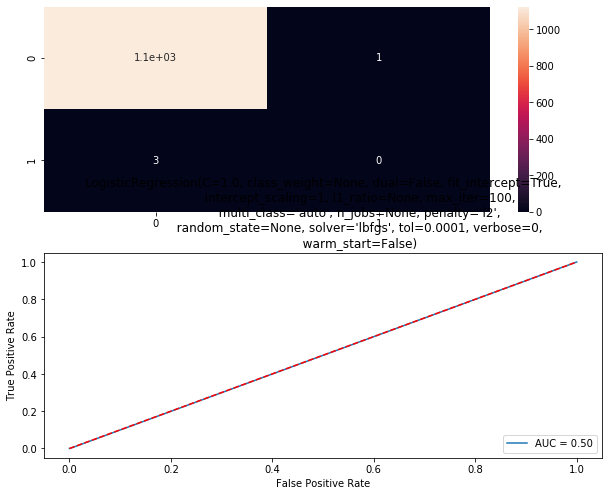

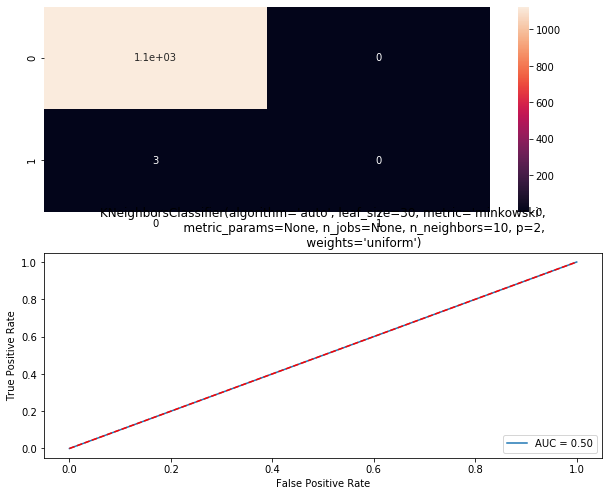

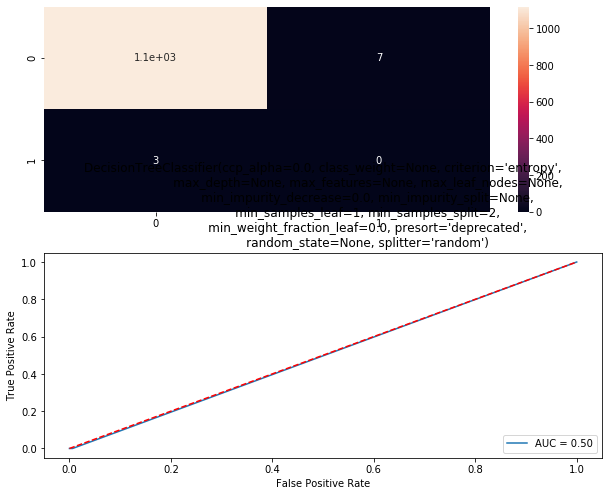

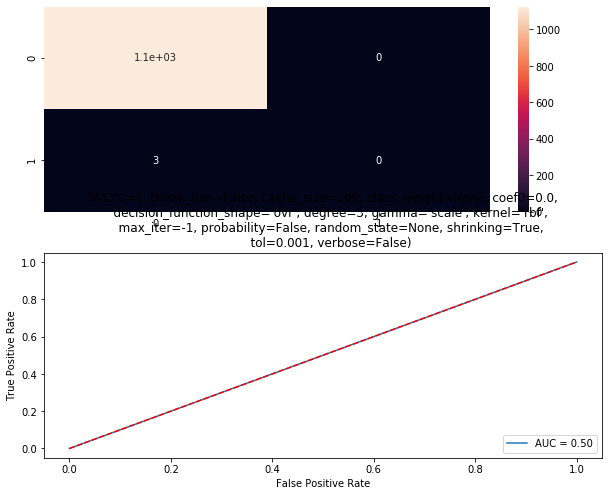

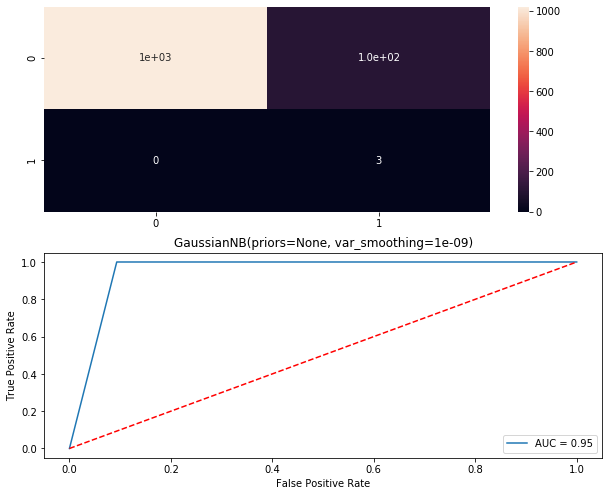

In [195]:
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 10, weights='uniform'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'random'), SVC(C=1, kernel='rbf'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x2,train_y2)
    pred=i.predict(test_x2)
    accscore=accuracy_score(test_y2,pred)
    score.append(accscore)
    print("The accuracy score is ", accscore)
    cvscore=cross_val_score(i,x,y2,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y2,pred))
    print()
    cm=confusion_matrix(test_y2,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y2,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [196]:
result3=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB()],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result3

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.996457,0.986886,0.499556
1,<class 'sklearn.neighbors._classification.KNei...,0.997343,0.991141,0.500000
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.991143,0.984937,0.496892
3,<class 'sklearn.svm._classes.SVC'>,0.997343,0.991141,0.500000
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.906997,0.916542,0.953375


In [197]:
# Let us finalise the GaussianNB as it is giving better AUC ROC scores as well along with good accuracy score and cross val score
gb=GaussianNB()
gb.fit(train_x2,train_y2)
pred=gb.predict(test_x2)
acc_score=accuracy_score(pred,test_y2)
print("The accuracy score is", acc_score)
cross_score=cross_val_score(gb,x,y2,cv=5,scoring='accuracy').mean()
print("The cross validation score is ", cross_score)

The accuracy score is 0.9069973427812223
The cross validation score is  0.9165424432592705


In [198]:
# Saving the model
joblib.dump(gb,"Project20_Semi intensive ward prediction.pkl")

['Project20_Semi intensive ward prediction.pkl']

Predicting the fourth target - whether the patient is admitted to the intensive unit care

In [199]:
# determining the best random state
def max_acc_score(lr,x,y):
    max_score=0
    for r_state in range(42,101):
        train_x3,test_x3,train_y3,test_y3=train_test_split(x,y3,random_state=r_state,test_size=0.20)
        lr.fit(train_x3,train_y3)
        pred=lr.predict(test_x3)
        acc_score=accuracy_score(pred,test_y3)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
            
    print("The random state at which the highest accuracy score", max_score, "is achieved at", final_r_state)

In [200]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

max_acc_score(lg,x,y3)

The random state at which the highest accuracy score 0.9964570416297609 is achieved at 99


In [201]:
#Lets finalise the train and test data
train_x3,test_x3,train_y3,test_y3=train_test_split(x,y3,random_state=99,test_size=0.20)

Finding best parameters Using GridSearchCV

In [202]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x3,train_y3)
gdkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

In [203]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x3,train_y3)
gddt.best_params_

{'criterion': 'gini', 'splitter': 'random'}

In [204]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x3,train_y3)
gdsv.best_params_

{'C': 1, 'kernel': 'rbf'}

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
The accuracy score is  0.9964570416297609
The cross val score is 0.9909626293274032

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1125
           1       0.50      0.25      0.33         4

    accuracy                           1.00      1129
   macro avg       0.75      0.62      0.67      1129
weighted avg       1.00      1.00      1.00      1129


[[1124    1]
 [   3    1]]

roc_auc_score 0.6245555555555554


AxesSubplot(0.125,0.808774;0.62x0.0712264)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
    

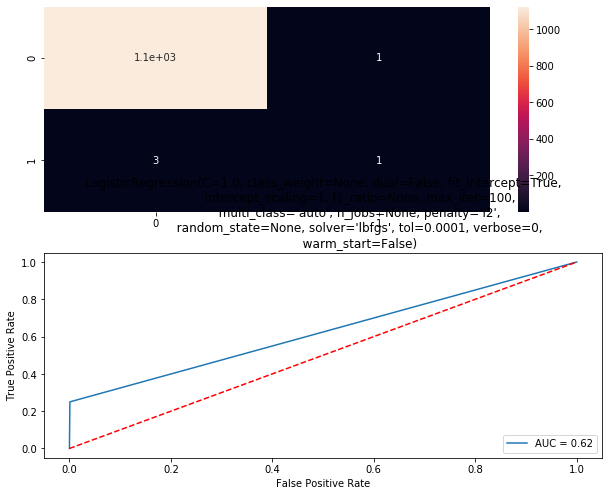

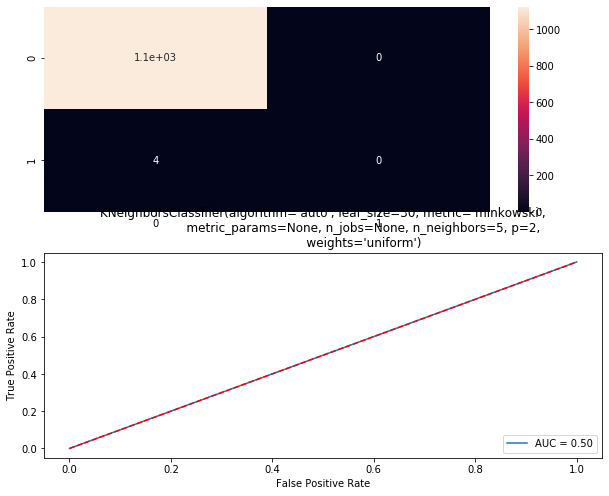

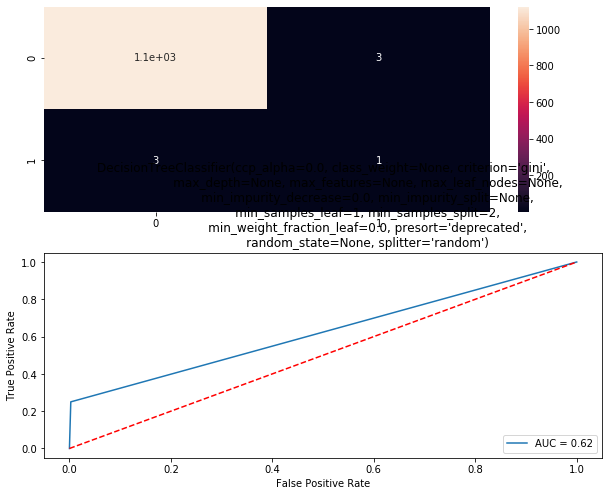

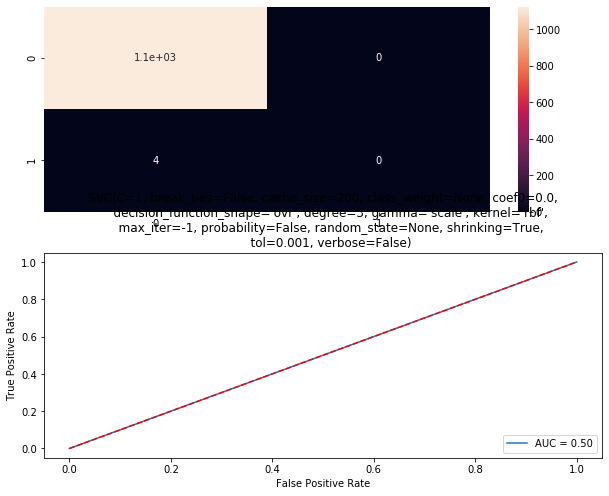

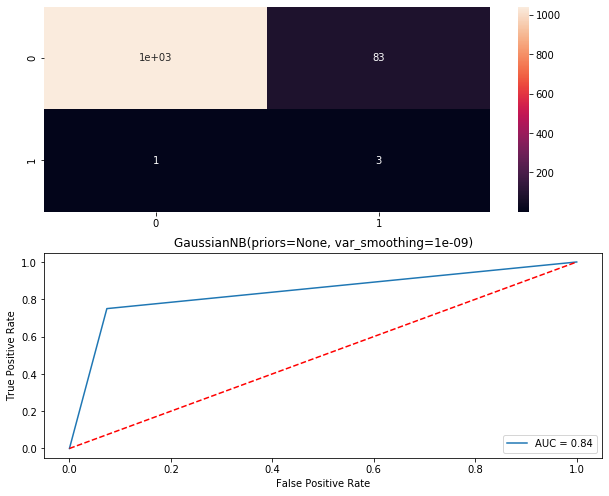

In [205]:
# Lets check the best models
from sklearn.metrics import accuracy_score, auc, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB

score=[]
cv=[]
rocscore=[]


algorithms=[lg,KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights='uniform'), DecisionTreeClassifier(criterion= 'gini', splitter= 'random'), SVC(C=1, kernel='rbf'),GaussianNB()]

for i in algorithms:
    print(i)
    i.fit(train_x3,train_y3)
    pred=i.predict(test_x3)
    accscore=accuracy_score(test_y3,pred)
    score.append(accscore)
    print("The accuracy score is ", accscore)
    cvscore=cross_val_score(i,x,y3,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y3,pred))
    print()
    cm=confusion_matrix(test_y3,pred)
    print(cm)
    print()
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y3,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n")
    print("\n")

In [206]:
result4=pd.DataFrame({'Model':[LogisticRegression,KNeighborsClassifier, DecisionTreeClassifier, SVC,GaussianNB()],'Accuracy_Score':score,'Cross_val_score':cv, 'AUC_ROC':rocscore})
result4

,Model,Accuracy_Score,Cross_val_score,AUC_ROC
0,<class 'sklearn.linear_model._logistic.Logisti...,0.996457,0.990963,0.624556
1,<class 'sklearn.neighbors._classification.KNei...,0.996457,0.992204,0.500000
2,<class 'sklearn.tree._classes.DecisionTreeClas...,0.994686,0.985823,0.623667
3,<class 'sklearn.svm._classes.SVC'>,0.996457,0.992736,0.500000
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.925598,0.915657,0.838111


In [207]:
# Let us finalise the GaussianNB as it is giving better AUC ROC scores as well
gb=GaussianNB()
gb.fit(train_x3,train_y3)
pred=gb.predict(test_x3)
acc_score=accuracy_score(pred,test_y3)
print("The accuracy score is", acc_score)
cross_score=cross_val_score(gb,x,y3,cv=5,scoring='accuracy').mean()
print("The cross validation score is ", cross_score)

The accuracy score is 0.9255978742249779
The cross validation score is  0.9156565466206835


In [208]:
# Saving the model
joblib.dump(gb,"Project20_intensive ward prediction.pkl")

['Project20_intensive ward prediction.pkl']